<a href="https://colab.research.google.com/github/ejerasga/Linear-Regression-in-Diabetes-Dataset/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('drive/MyDrive/dataset/diabetes.csv')
dataset = df.copy()
print(dataset.shape)
dataset.head(20)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
dataset = dataset.drop_duplicates()
dataset.shape

(768, 9)

In [ ]:
dataset.drop('Pregnancies', inplace=True, axis=1)
dataset.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [ ]:
newdataset = dataset.dropna()
print(dataset.shape)
print(newdataset.shape)

(768, 8)
(768, 8)


In [ ]:
mapper = {"0": 0, "1": 1}
encoded = newdataset.copy()
encoded['Outcome'] = encoded["Outcome"].replace(mapper)
print(newdataset['Outcome'].value_counts())
print(encoded['Outcome'].value_counts())


0    500
1    268
Name: Outcome, dtype: int64
0    500
1    268
Name: Outcome, dtype: int64


In [ ]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


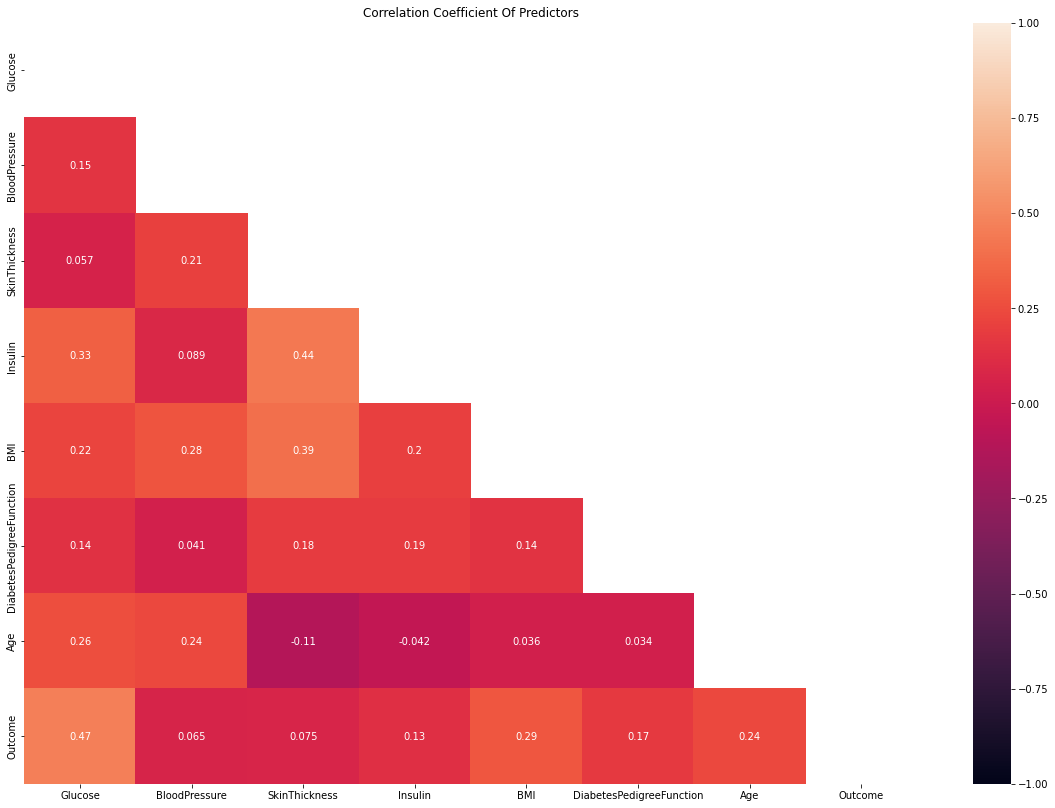

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20,14))
mask = np.triu(np.ones_like(encoded.corr(), dtype=bool))

sns.heatmap(encoded.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):

    X = encoded[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

# features to consider removing
considered_features = ['BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# compute vif
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Variable,VIF
1,SkinThickness,1.471301
2,Insulin,1.254091
3,BMI,1.252879
0,BloodPressure,1.179205
5,Age,1.097637
4,DiabetesPedigreeFunction,1.058591


In [ ]:
considered_features.remove('SkinThickness')
compute_vif(considered_features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Variable,VIF
0,BloodPressure,1.155125
1,Insulin,1.074862
2,BMI,1.136296
3,DiabetesPedigreeFunction,1.049349
4,Age,1.067651


In [ ]:
df_final_feats = encoded.drop(['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], axis = 1)
y = df_final_feats['Outcome']
x = df_final_feats.drop(['Outcome'], axis = 1)

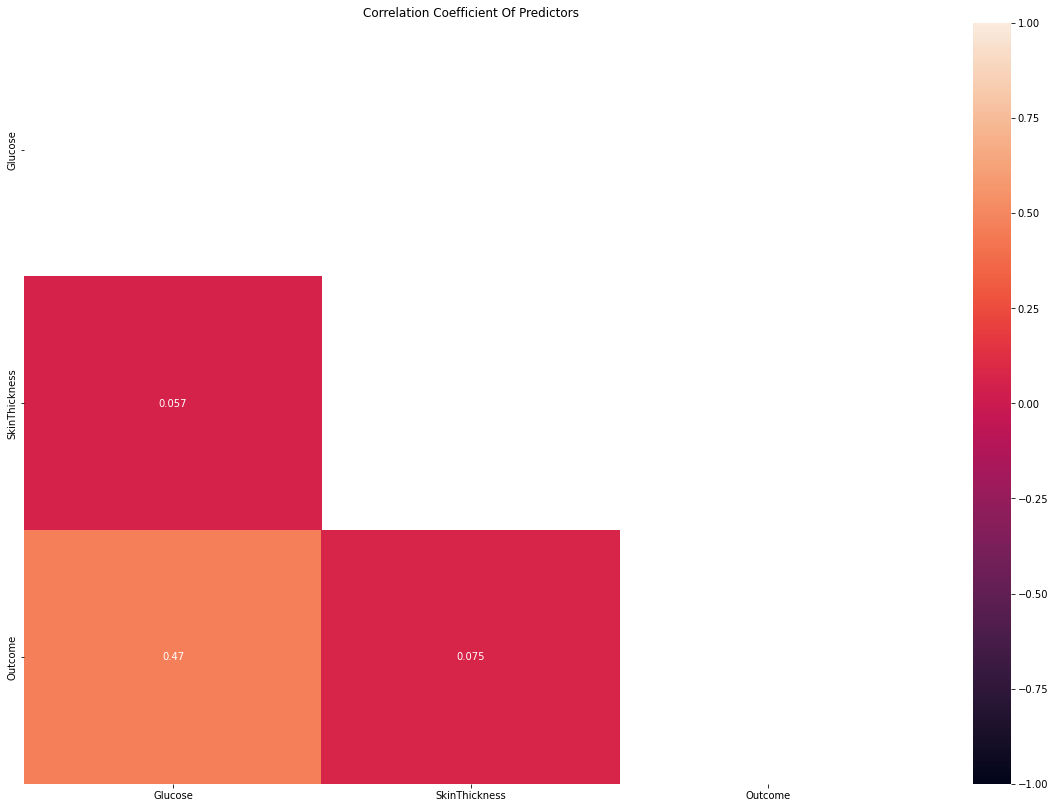

In [ ]:
plt.figure(figsize=(20,14))
mask = np.triu(np.ones_like(df_final_feats.corr(), dtype=bool))

sns.heatmap(df_final_feats.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
scaler2 = MinMaxScaler()
X_std = scaler.fit_transform(x)
X_std2 = scaler2.fit_transform(x)
print(X_std)
print(X_std2)

[[ 0.84832379  0.90726993]
 [-1.12339636  0.53090156]
 [ 1.94372388 -1.28821221]
 ...
 [ 0.00330087  0.15453319]
 [ 0.1597866  -1.28821221]
 [-0.8730192   0.65635768]]
[[0.74371859 0.35353535]
 [0.42713568 0.29292929]
 [0.91959799 0.        ]
 ...
 [0.6080402  0.23232323]
 [0.63316583 0.        ]
 [0.46733668 0.31313131]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=0, train_size = .75)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 2)
(576,)
(192, 2)
(192,)


# LinearRegression

Linear Regression

1. Assumptions
2. Viewing the data
3. Train Test Split
4. Implementation
5. Evaluating

Link for my Google Colab https://colab.research.google.com/drive/1N-2kXOa1DgxWSjPI9uh4bqLD5cvBAlcy?usp=sharing

The dataset contains different properties of Pima Indians Diabetes. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Satisfying Assumptions - See if there is a linear relationship between the two variables.

2. Viewing the data - We chose Age and Blood Pressure variables becaause this is the most essential data that we need to predict whether or not a patient has diabetes.

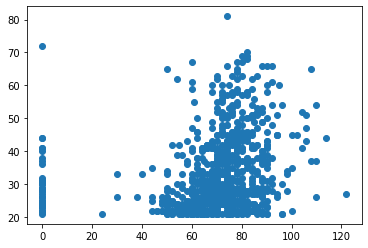

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define data values
x = np.array(df['BloodPressure'])  # X-axis points
y = np.array(df['Age'])  # Y-axis points

plt.scatter(x, y)  # Plot the chart
plt.show()  # display

2. Scaling - It puts your datasets on one scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y)

3. Train Test Split - The procedure involves taking a dataset and dividing it into train set and test set. Train set is used for training the model. On the other hand, test set is used to evaluate the performance of the model.

In [ ]:
#Divide dataset to train and test set.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.20, random_state=1)

4. Implementation - Here, we reshaped the train test datasets as the fit() function requires 2D parameters (If we did not reshape our splitted data, we have 1D arrays). Afterwards, the training set is then fed into our model.

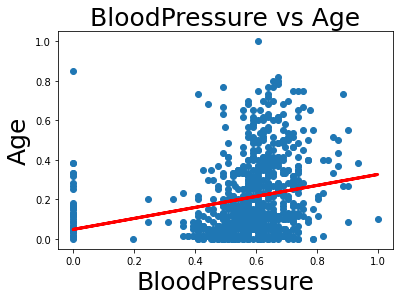

In [ ]:
X_train_reshaped = np.reshape(X_train, (-1, 1))

my_model = LinearRegression()
my_model.fit(X_train_reshaped, y_train)
y_pred = my_model.predict(X_train_reshaped) # [0, 0.1, 0.2, 0.3, 0.4]


plt.scatter(x_scaled, y_scaled)
plt.plot(X_train, y_pred, color='red', linewidth='3')
plt.xlabel('BloodPressure',fontsize=25)
plt.ylabel('Age',fontsize=25)
plt.title('BloodPressure vs Age',fontsize=25)
plt.show()

5. Evaluation - We will used R Squared (R^2) that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = my_model.predict(X_test)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
r_sq = my_model.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")
print(f"MSE {mean_squared_error(y_test, y_pred)}")
print(f"RMSE {mean_squared_error(y_test, y_pred, squared=False)}")

coefficient of determination: 0.07711269728558723
MSE 0.03423534685520534
RMSE 0.185027962360302
